<a href="https://colab.research.google.com/github/weyland-zekai-xu/tutorial/blob/main/neuralmodelling_RL_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural modelling Assignment 2



## Task 1.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def step(state, action):
    if state == 1:
        if action == 'C':

            return np.random.choice([2, 3], p=[0.5, 0.5]), 0
        else:
            return None, 1 if action == 'L' else 2
    elif state == 2:

        return None, 8 if action == 'L' else -8
    elif state == 3:
        return None, 0 if action == 'L' else 4


def simulate_episode(policy, state_values, epsilon):
    state = 1
    while state is not None:
        action = policy(state)
        next_state, reward = step(state, action)
        next_value = 0 if next_state is None else state_values.get(next_state, 0)
        delta = reward + next_value - state_values[state]
        state_values[state] += epsilon * delta
        state = next_state if next_state is not None else None

def random_policy(state):
    if state == 1:
        return np.random.choice(['L', 'C', 'R'])
    else:
        return np.random.choice(['L', 'R'])

#  TD learning over multiple trials
def td_learning(policy, state_values, epsilon, num_trials):
    history = {state: [] for state in state_values.keys()}
    for _ in range(num_trials):
        simulate_episode(policy, state_values, epsilon)
        for state in state_values.keys():
            history[state].append(state_values[state])
    return history





lr = 0.1, average over 100

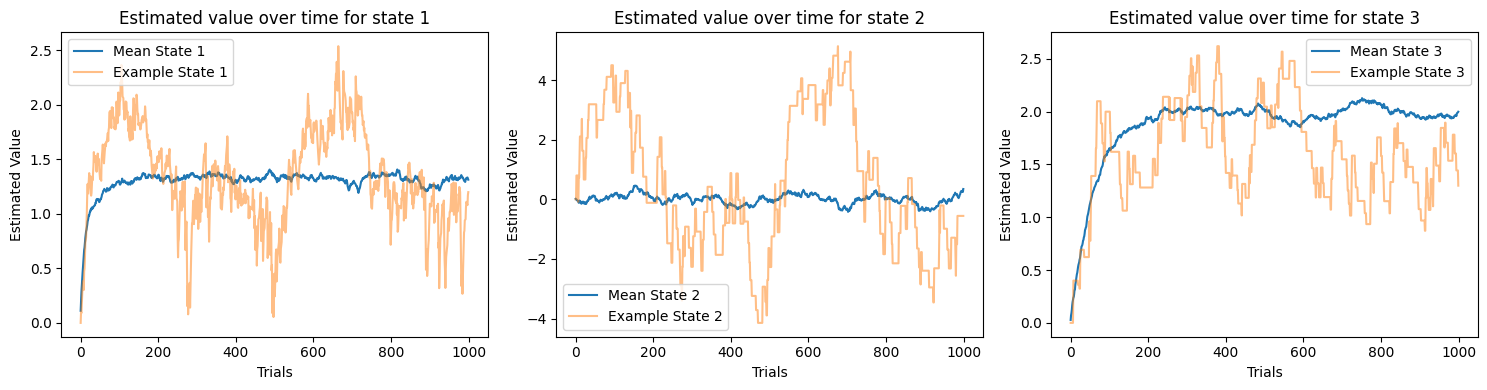

In [ ]:

state_values = {1: 0, 2: 0, 3: 0}
epsilon = 0.1


mean_history = {state: np.zeros(1000) for state in state_values.keys()}
for _ in range(100):

    state_values = {1: 0, 2: 0, 3: 0}
    history = td_learning(random_policy, state_values, epsilon, 1000)
    for state in mean_history.keys():
        mean_history[state] += np.array(history[state])

for state in mean_history.keys():
    mean_history[state] /= 100


example_run = history


plt.figure(figsize=(15, 4))
for i, state in enumerate(mean_history.keys(), 1):
    plt.subplot(1, 3, i)
    plt.plot(mean_history[state], label=f'Mean State {state}')
    plt.plot(example_run[state], label=f'Example State {state}', alpha=0.5)
    plt.title(f'Estimated value over time for state {state}')
    plt.xlabel('Trials')
    plt.ylabel('Estimated Value')
    plt.legend()
plt.tight_layout()
plt.show()





lr = 0.2

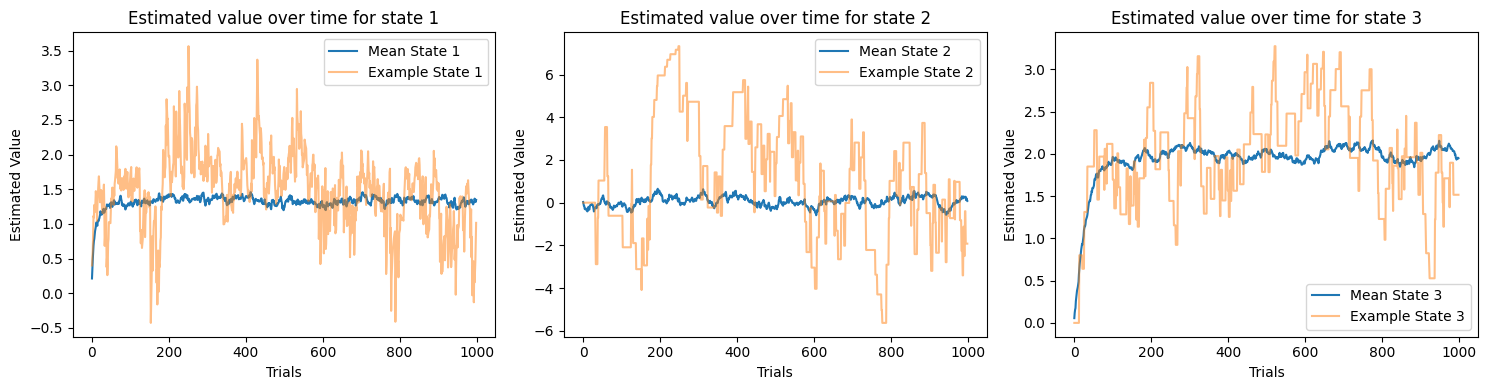

In [ ]:


state_values = {1: 0, 2: 0, 3: 0}
epsilon = 0.2

mean_history = {state: np.zeros(1000) for state in state_values.keys()}
for _ in range(100):

    state_values = {1: 0, 2: 0, 3: 0}
    history = td_learning(random_policy, state_values, epsilon, 1000)
    for state in mean_history.keys():
        mean_history[state] += np.array(history[state])


for state in mean_history.keys():
    mean_history[state] /= 100

example_run = history

plt.figure(figsize=(15, 4))
for i, state in enumerate(mean_history.keys(), 1):
    plt.subplot(1, 3, i)
    plt.plot(mean_history[state], label=f'Mean State {state}')
    plt.plot(example_run[state], label=f'Example State {state}', alpha=0.5)
    plt.title(f'Estimated value over time for state {state}')
    plt.xlabel('Trials')
    plt.ylabel('Estimated Value')
    plt.legend()
plt.tight_layout()
plt.show()

## 1.2

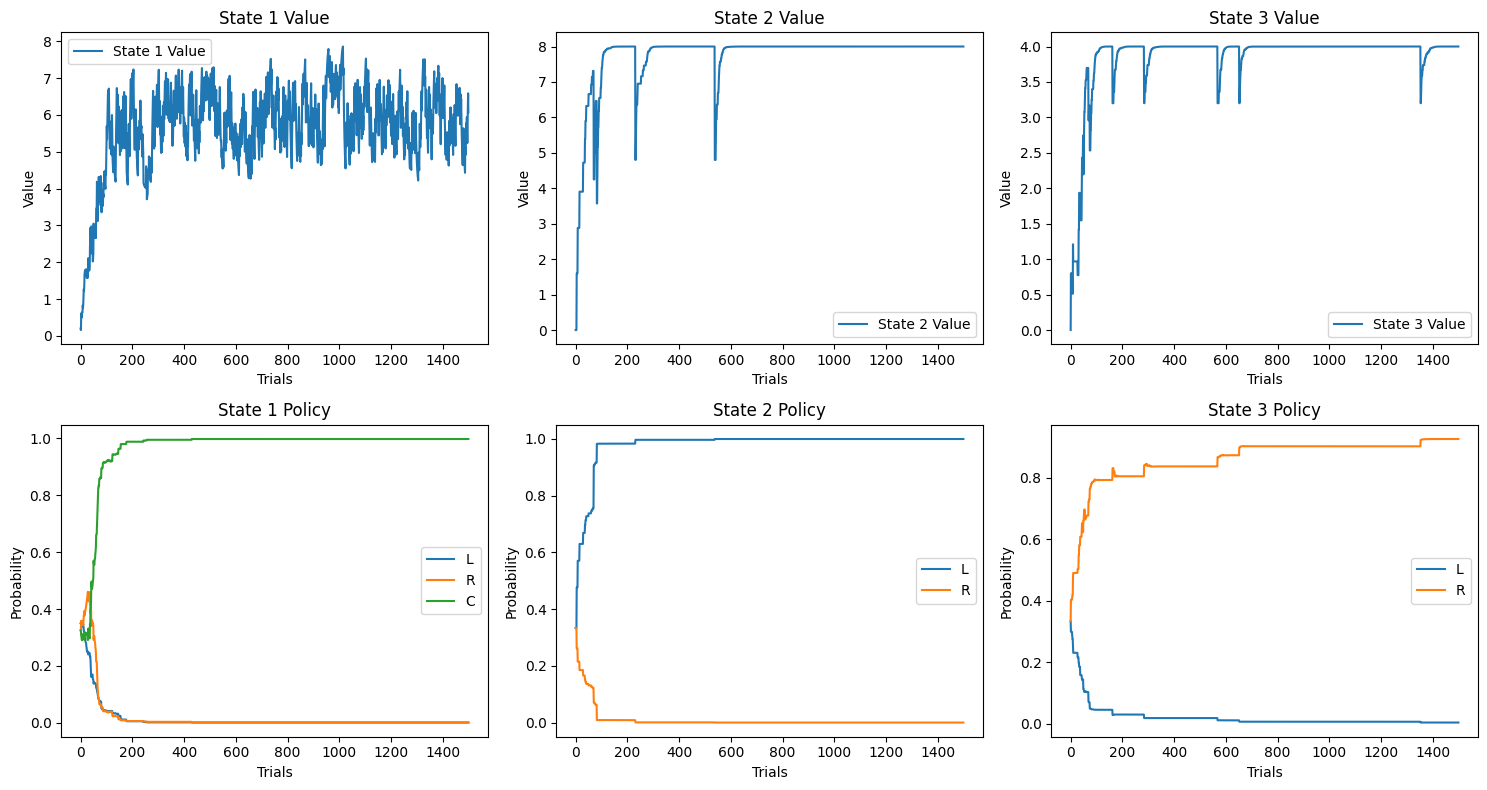

In [51]:


num_states = 3
num_actions = 3

state_values = np.zeros(num_states + 1)
theta = np.zeros((num_states + 1, num_actions))


alpha_value = 0.2  # critic lr from the book
alpha_theta = 0.075  # actor lr from the book


def softmax_policy(state, theta):
    preferences = theta[state]
    max_preference = np.max(preferences)
    exp_preferences = np.exp(preferences - max_preference)
    return exp_preferences / np.sum(exp_preferences)


def choose_action(state, theta):
    probabilities = softmax_policy(state, theta)
    return np.random.choice(['L', 'C', 'R'], p=probabilities)

def update_theta(theta, state, action, td_error, alpha_theta):
    probabilities = softmax_policy(state, theta)
    action_taken = ['L', 'C', 'R'].index(action)
    theta[state] -= alpha_theta * td_error * probabilities
    theta[state, action_taken] += alpha_theta * td_error


def actor_critic(num_trials, num_states, num_actions, alpha_value, alpha_theta):
    value_history = np.zeros((num_states + 1, num_trials))
    policy_history = np.zeros((num_states + 1, num_actions, num_trials))

    for trial in range(num_trials):
        state = 1  # Start state
        while state is not None:
            action = choose_action(state, theta)
            next_state, reward = step(state, action)
            next_value = 0 if next_state is None else state_values[next_state]
            td_error = reward + next_value - state_values[state]
            state_values[state] += alpha_value * td_error

            # if not in terminal state
            if state != 0:
                update_theta(theta, state, action, td_error, alpha_theta)

            state = next_state

        value_history[:, trial] = state_values
        for s in range(1, num_states + 1):
            policy_history[s, :, trial] = softmax_policy(s, theta)

    return value_history, policy_history


value_history, policy_history = actor_critic(num_trials=1500, num_states=num_states,
                                             num_actions=num_actions, alpha_value=alpha_value,
                                             alpha_theta=alpha_theta)

plt.figure(figsize=(15, 8))
for i in range(1, num_states + 1):
    plt.subplot(2, num_states, i)
    plt.plot(value_history[i], label=f'State {i} Value')
    plt.title(f'State {i} Value')
    plt.xlabel('Trials')
    plt.ylabel('Value')
    plt.legend()

    plt.subplot(2, num_states, i + num_states)
    plt.plot(policy_history[i, 0], label='L')
    plt.plot(policy_history[i, 2], label='R')
    if i == 1:
         plt.plot(policy_history[i, 1], label='C')
    plt.title(f'State {i} Policy')
    plt.xlabel('Trials')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()


## 2

In [65]:

def step(state, action):
    if state == 2:
        return 4 if action == 'C' else 0
    elif state == 3:
        return 2 if action == 'E' else 3


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)




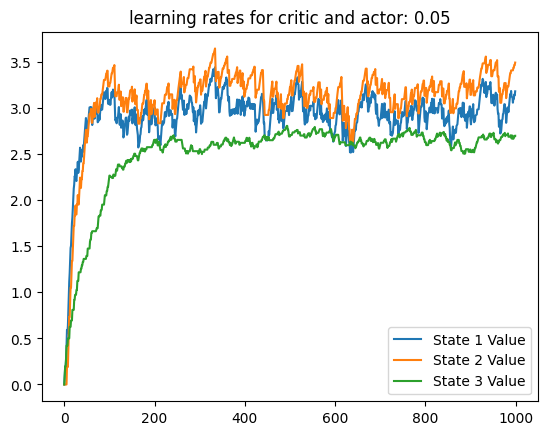

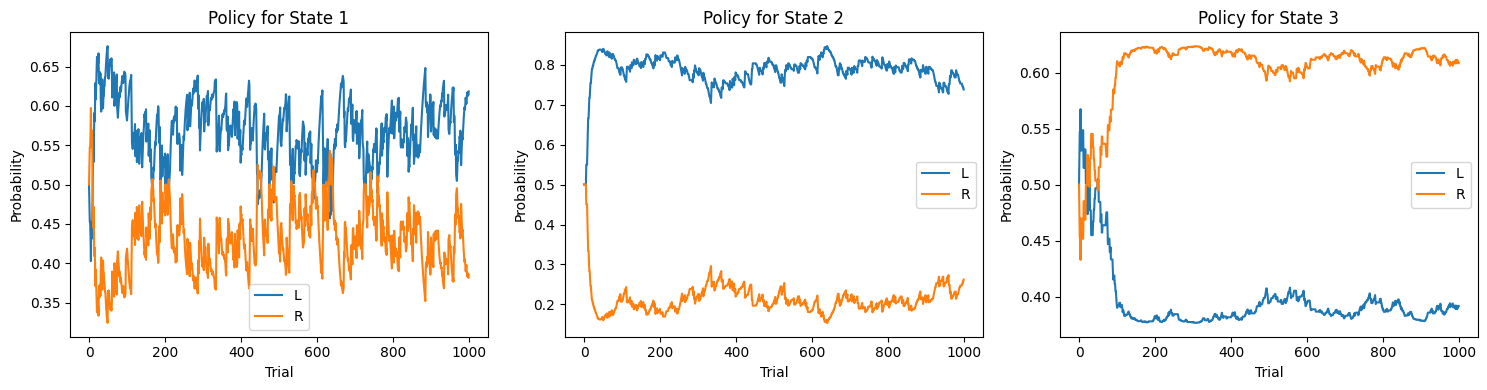

In [72]:

def update_critic(V, state, reward, alpha_V):
    td_target = reward
    td_error = td_target - V[state]
    V[state] += alpha_V * td_error
    return td_error

def update_actor(theta, state, action, td_error, alpha_theta):
    policy = softmax(theta[state])
    action_taken = np.zeros(len(policy))
    action_taken[action] = 1  # action is the index of the chosen action
    theta[state] = (1 - alpha_theta) * theta[state] + alpha_theta * td_error * action_taken


V = np.zeros(4)
theta = np.zeros((4, 2))  # 2 actions at each decision point

# Learning rates
alpha_V = 0.05  #  for critic
alpha_theta = 0.05  # for actor


history_V = np.zeros((num_trials, 3))
history_theta = np.zeros((num_trials, 3, 2))


action_mapping = {'A': 0, 'B': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 1}

# Simulation loop
for trial in range(num_trials):

    state = 1
    action_probs = softmax(theta[state])
    action = np.random.choice(['A', 'B'], p=action_probs)
    action_idx = action_mapping[action]


    next_state = 2 if action == 'A' else 3
    next_action_probs = softmax(theta[next_state])
    next_action_choices = ['C', 'D'] if action == 'A' else ['E', 'F']
    next_action = np.random.choice(next_action_choices, p=next_action_probs)
    next_action_idx = action_mapping[next_action]

    # Get the reward
    reward = step(next_state, next_action)

    # Update critic and actor for the first decision
    td_error = update_critic(V, state, reward, alpha_V)
    update_actor(theta, state, action_idx, td_error, alpha_theta)

    # Update critic and actor for the second decision
    td_error_next = update_critic(V, next_state, reward, alpha_V)
    update_actor(theta, next_state, next_action_idx, td_error_next, alpha_theta)

    # Save history
    history_V[trial] = V[1:4]
    history_theta[trial] = theta[1:4]


for i in range(1, 4):
    plt.plot(history_V[:, i-1], label=f'State {i} Value')
    plt.title(f'learning rates for critic and actor: {alpha_V}')
plt.legend()
plt.show()

policy_probabilities = np.apply_along_axis(softmax, 2, history_theta)
plt.figure(figsize=(15, 4))

for i in range(1, 4):
    plt.subplot(1, num_states, i)
    plt.plot(policy_probabilities[:, i-1, 0], label='L')
    plt.plot(policy_probabilities[:, i-1, 1], label='R')
    plt.title(f'Policy for State {i}')
    plt.xlabel('Trial')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()


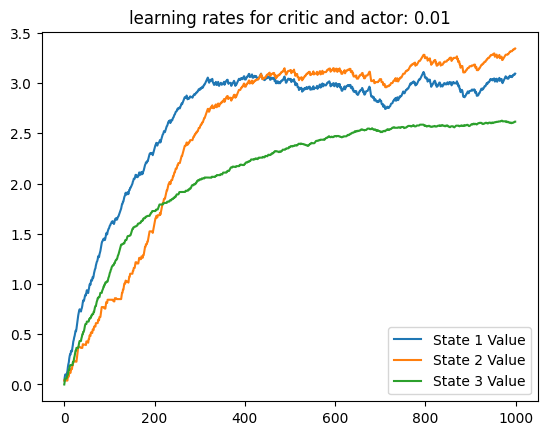

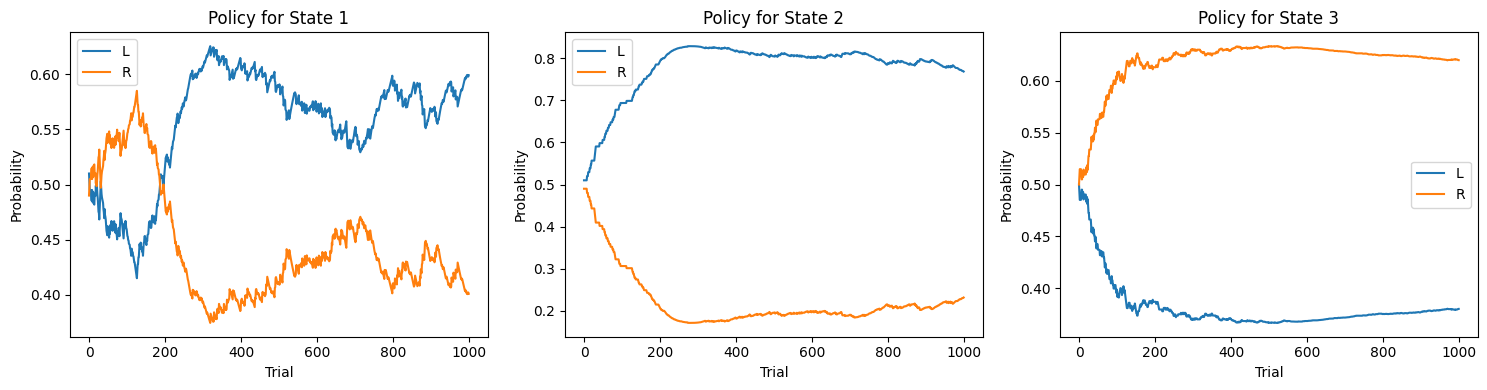

In [70]:
V = np.zeros(4)
theta = np.zeros((4, 2))  # 2 actions at each decision point


history_V = np.zeros((num_trials, 3))
history_theta = np.zeros((num_trials, 3, 2))




alpha_V = 0.01  #  for critic
alpha_theta = 0.01  # for actor

# Simulation loop
for trial in range(num_trials):

    state = 1
    action_probs = softmax(theta[state])
    action = np.random.choice(['A', 'B'], p=action_probs)
    action_idx = action_mapping[action]


    next_state = 2 if action == 'A' else 3
    next_action_probs = softmax(theta[next_state])
    next_action_choices = ['C', 'D'] if action == 'A' else ['E', 'F']
    next_action = np.random.choice(next_action_choices, p=next_action_probs)
    next_action_idx = action_mapping[next_action]

    # Get the reward
    reward = step(next_state, next_action)

    # Update critic and actor for the first decision
    td_error = update_critic(V, state, reward, alpha_V)
    update_actor(theta, state, action_idx, td_error, alpha_theta)

    # Update critic and actor for the second decision
    td_error_next = update_critic(V, next_state, reward, alpha_V)
    update_actor(theta, next_state, next_action_idx, td_error_next, alpha_theta)

    # Save history
    history_V[trial] = V[1:4]
    history_theta[trial] = theta[1:4]


for i in range(1, 4):
    plt.plot(history_V[:, i-1], label=f'State {i} Value')
    plt.title(f'learning rates for critic and actor: {alpha_V}')
plt.legend()
plt.show()

policy_probabilities = np.apply_along_axis(softmax, 2, history_theta)
plt.figure(figsize=(15, 4))

for i in range(1, 4):
    plt.subplot(1, num_states, i)
    plt.plot(policy_probabilities[:, i-1, 0], label='L')
    plt.plot(policy_probabilities[:, i-1, 1], label='R')
    plt.title(f'Policy for State {i}')
    plt.xlabel('Trial')
    plt.ylabel('Probability')
    plt.legend()

plt.tight_layout()
plt.show()